In [ ]:
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape, Activation, Dropout, Add, Attention
from keras import Sequential
from keras.layers import BatchNormalization
from keras.models import Model
import matplotlib.pyplot as plt
import os
import numpy as np
import argparse
import pandas as pd
import math
from keras.layers import Conv1D, Flatten, Input,MaxPooling1D, SeparableConv1D
from tensorflow.keras import optimizers, Model
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [ ]:
import math
def compute_log_loss_for_one_sample(y_obs, y_pred):
  #print("yobs = ", y_obs, "y_pred =", y_pred)
  return -(y_obs * math.log(y_pred) + (1-y_obs)*math.log(1-y_pred))

def compute_log_loss(y_obs, y_pred):
  log_loss = -np.mean(y_obs * np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))
  return log_loss

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd  /content/drive/MyDrive/Biomarketers
%pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1kvysfPHz20qIMQi4u95yq6zZglZXtTs_/Biomarketers


'/content/drive/.shortcut-targets-by-id/1kvysfPHz20qIMQi4u95yq6zZglZXtTs_/Biomarketers'

## First model

In [ ]:
# First dataset :
X_train = pd.read_csv("X_train_1.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_1.csv")
print(y_train.shape)

(2625, 1112)
(2625, 1)


In [ ]:
from keras.regularizers import l2

def first_model():
  model = Sequential()
  model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],),kernel_regularizer=l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='tanh', kernel_regularizer=l2(0.01)))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = first_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(X_train,y_train, epochs=100, batch_size=100, validation_split=0.2)

Ca me parait très random tout ça.

### Essai avec le 2 ème JDD



In [ ]:
# Second dataset :
X_train = pd.read_csv("X_train_2.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_2.csv", index_col=[0])
print(y_train.shape)

(2813, 509)
(2813, 1)


In [ ]:
model = first_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train,y_train, epochs=25, batch_size=75)

## Essai avec un autre petit processing :

(2625, 1112)
(2625, 1)


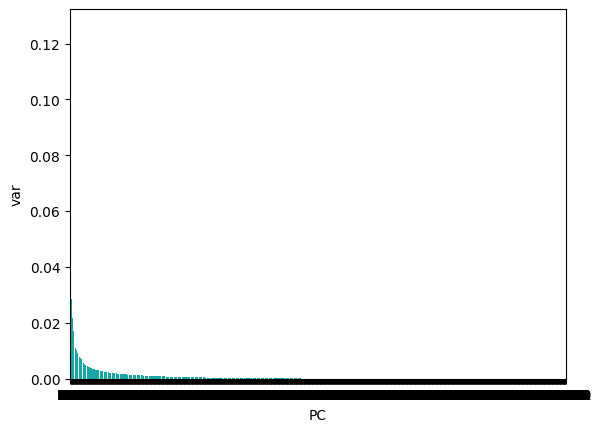

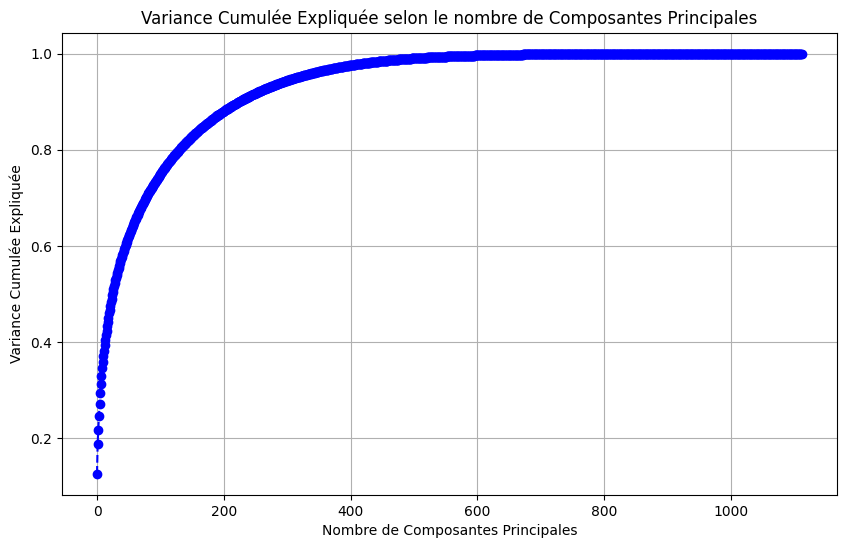

In [ ]:
# First dataset : CAREFUL DATA HAS ALREADY BEEN SCALED !!!
X_train = pd.read_csv("X_train_1.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_1.csv")
print(y_train.shape)
N_compo = 1112

pca = PCA(n_components=N_compo)# Un peu trop grand non ?

# Fit PCA to the data
projected = pca.fit_transform(X_train)

# Ploting the PCA components particpation to the variability :
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC'+str(i) for i in range(1,N_compo+1)]})
sns.barplot(x='PC',y="var",
           data=df, color="c");


# Define X_train as the components analysis :

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot de la variance cumulée
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulée Expliquée')
plt.title('Variance Cumulée Expliquée selon le nombre de Composantes Principales')
plt.grid(True)
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(N_compo,)))  # n_components est le nombre de composantes principales
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie pour un problème de classification binaire

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(projected, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 3s 19ms/step - loss: 0.6704 - accuracy: 0.5914 - val_loss: 0.5832 - val_accuracy: 0.7238
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5514 - accuracy: 0.7271 - val_loss: 0.5063 - val_accuracy: 0.7581
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 0.4333 - accuracy: 0.8119 - val_loss: 0.5113 - val_accuracy: 0.7600
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 0.3673 - accuracy: 0.8467 - val_loss: 0.5255 - val_accuracy: 0.7810
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 0.2892 - accuracy: 0.8810 - val_loss: 0.6027 - val_accuracy: 0.7638
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.2419 - accuracy: 0.9014 - val_loss: 0.6450 - val_accuracy: 0.7733
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2138 - accuracy: 0.9186 - val_loss: 0.7088 - val_accuracy: 0.7581
Epoch 8/100


##### On the test data set :

In [ ]:

X_test = pd.read_csv("X_test_1.csv")
print(X_test.shape)
y_test = pd.read_csv("y_test_1.csv")
print(y_test.shape)

(1126, 1112)
(1126, 1)


In [ ]:
X_test_pca = pca.transform(X_test)

y_pred_test_proba = model.predict(X_test_pca)
y_test_classes = np.where(y_pred_test_proba > 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))



36/36 [==============================] - 0s 2ms/step


In [ ]:
# Confusion matrix :
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print("Accuracy", accuracy)

[[350 159]
 [122 495]]
Accuracy 0.7504440497335702




## CNN

(2625, 1112)
(2625, 1)


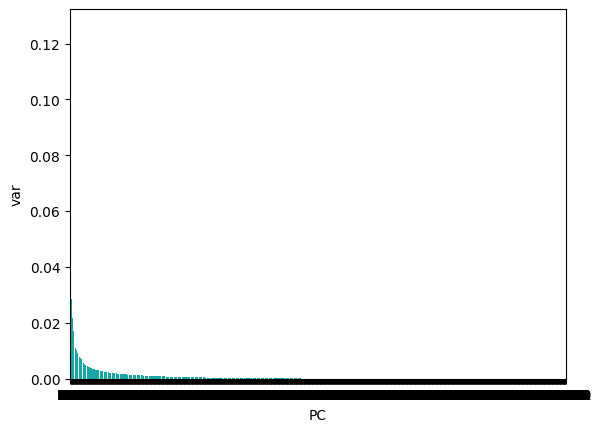

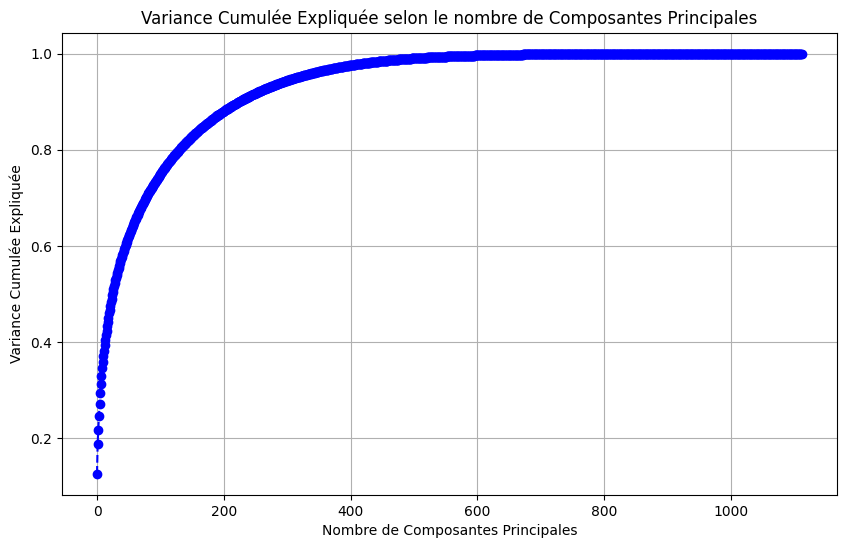

In [ ]:
# First dataset : CAREFUL DATA HAS ALREADY BEEN SCALED !!!
X_train = pd.read_csv("X_train_1.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_1.csv")
print(y_train.shape)
N_compo = 1112

pca = PCA(n_components=N_compo)# Un peu trop grand non ?

# Fit PCA to the data
projected = pca.fit_transform(X_train)

# Ploting the PCA components particpation to the variability :
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC'+str(i) for i in range(1,N_compo+1)]})
sns.barplot(x='PC',y="var",
           data=df, color="c");


# Define X_train as the components analysis :

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot de la variance cumulée
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulée Expliquée')
plt.title('Variance Cumulée Expliquée selon le nombre de Composantes Principales')
plt.grid(True)
plt.show()

In [ ]:

# Reshape data :
X_train_reshaped = np.reshape(X_train,(2625, 1112))#X_train.shape (2813, 1112)



In [ ]:
def cnn_simple():
  # Define the input shape
  input_shape = (1112, 1)

  model = Sequential()

  model.add(Conv1D(256, 4, activation='relu', input_shape=input_shape))
  model.add(MaxPooling1D())
  # Dropout because too much over fitting
  model.add(Dropout(0.5))

  model.add(Conv1D((512), 4, activation='relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(0.5))

  model.add(Conv1D((1024), 4, activation='relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))

  model.add(Dense(1, activation='sigmoid')) # probability

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #pas sure de la métriqued
  return model

In [ ]:
def bloc_cnn(model,n_nodes, n_filters, dropout_rate):
  model.add(Conv1D((n_nodes), n_filters, activation='relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(dropout_rate))
  return model

In [ ]:
# First training
model = cnn_simple()
history = model.fit(X_train_reshaped, y_train, validation_split = 0.2, epochs=20, batch_size=50)


### Best Model manual

##### Find the correct learning rate :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from keras.optimizers import Adam

def lr_schedule(epoch):
    start_lr = 1e-7
    end_lr = 1e-1
    return start_lr + epoch * (end_lr - start_lr) / epochs

# Create a simple neural network model
model = cnn_model_manual(input_shape=(1112,1))

# Compile the model with an initial learning rate (you can adjust this)
initial_lr = 1e-5
model.compile(optimizer=Adam(learning_rate=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

# Perform the learning rate range test
epochs = 50  # Number of total epochs

# Define Learning Rate Scheduler callback with custom schedule function
lr_callback = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, callbacks=[lr_callback])

# Visualize the learning rate vs. loss
lrs = [lr_schedule(epoch) for epoch in range(epochs)]
losses = history.history['loss']
plt.semilogx(lrs, losses)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Range Test')
plt.show()

In [ ]:
from tensorflow.keras import initializers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2,l1
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling1D,GlobalMaxPooling1D

def cnn_model_manual(input_shape):
  # Define the input shape
  input_shape = input_shape
  n_nodes = 10
  model = Sequential()
  n_ker = 4

  model.add(Conv1D(n_nodes,2 , activation='relu', input_shape=input_shape,padding="same"
                   #kernel_initializer=initializers.Orthogonal()
                   ))
  model.add(MaxPooling1D())
  # Dropout because too much over fitting
  model.add(Dropout(0.5))


  model.add(Conv1D(15, 2,padding="same"))
  #model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(0.5))


  model.add(Conv1D(20, 2, padding="same"))
  #model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(0.5))

  model.add(Flatten())

  # model.add(Dense(1112, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(900, activation='relu'))
  model.add(Dropout(0.5))
  # model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid')) # probability => log loss

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy']) #pas sure de la métriqued
  print(model.summary())
  return model

In [ ]:
  model_manual = cnn_model_manual( input_shape=(1112,1)) #(1112,1), 100
  early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
  history = model_manual.fit(X_train_reshaped, y_train, validation_split = 0.2, epochs=200, batch_size=150, callbacks=early_stopping)# partir de 30 epochs surapprentuissage visibke


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1112, 10)          30        
                                                                 
 max_pooling1d (MaxPooling1  (None, 556, 10)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 556, 10)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 556, 15)           315       
                                                                 
 activation (Activation)     (None, 556, 15)           0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 278, 15)           0         
 g1D)                                                   

Méthodes d'initialisations des poids : https://keras.io/api/layers/initializers/

##### On the test data set :

In [ ]:

X_test = pd.read_csv("X_test_1.csv")
print(X_test.shape)
y_test = pd.read_csv("y_test_1.csv")
print(y_test.shape)

(1126, 1112)
(1126, 1)


In [ ]:
y_pred_test_proba = model_manual.predict(X_test)
y_test_classes = np.where(y_pred_test_proba > 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))



36/36 [==============================] - 1s 18ms/step


[[236 273]
 [ 44 573]]
Accuracy 0.7184724689165186


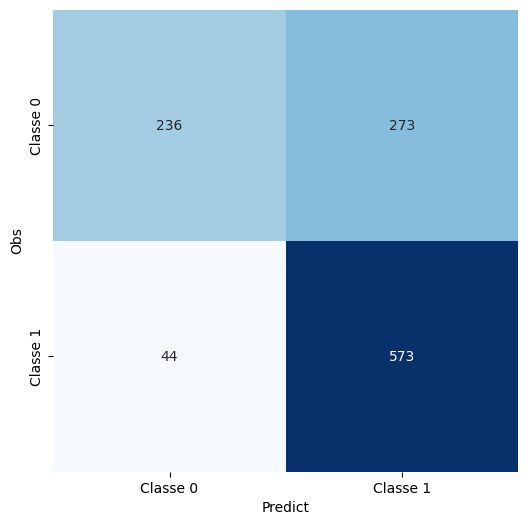

In [ ]:
# Confusion matrix :
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print("Accuracy", accuracy)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()

### DeepIC50

In [ ]:
#  dataset with 1500 descriptors :
X_train = pd.read_csv("X_train_15.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_15.csv")
print(y_train.shape)

(2625, 1533)
(2625, 1)


In [ ]:
model = Sequential()

## for yoon # Input size should be [batch, 1d, 2d, ch] = (None, 1, 15000, 1)
model.add(Conv1D (kernel_size = 3, filters = 78, input_shape=(1533,1)))
model.add(Activation('relu'))
# model.add(Conv1D (kernel_size = 2, filters = 20, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, padding='same'))
# model.add(Conv1D (kernel_size = 11, filters = 32, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv1D (kernel_size = 11, filters = 32, padding='same'))
# model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv1D (kernel_size = 11, filters = 64, padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(Dropout(0.5))
model.add(Conv1D (kernel_size = 2, filters = 64))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size =2))


model.add(Conv1D (kernel_size = 2, filters = 128))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size =2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense (64))
#model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dense (64))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Dense (2048))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Dense (4096))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Dense (2048))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Dense (1024))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile( loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
model.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_77 (Conv1D)          (None, 1531, 78)          312       
                                                                 
 activation_115 (Activation  (None, 1531, 78)          0         
 )                                                               
                                                                 
 max_pooling1d_77 (MaxPooli  (None, 766, 78)           0         
 ng1D)                                                           
                                                                 
 dropout_61 (Dropout)        (None, 766, 78)           0         
                                                                 
 conv1d_78 (Conv1D)          (None, 765, 64)           10048     
                                                                 
 activation_116 (Activation  (None, 765, 64)         

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)  # Stop training after 5 epochs of no improvement in validation loss
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Metric to be monitored
                              factor=0.1,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,          # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-7,         # Lower bound on the learning rate
                              verbose=1)
model_train = model.fit(X_train, y_train, batch_size=100,epochs=30,verbose=1, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/30
21/21 [==============================] - 19s 872ms/step - loss: 0.7767 - accuracy: 0.5152 - val_loss: 0.6849 - val_accuracy: 0.5352 - lr: 0.0050
Epoch 2/30
21/21 [==============================] - 13s 618ms/step - loss: 0.6823 - accuracy: 0.5552 - val_loss: 0.6794 - val_accuracy: 0.6362 - lr: 0.0050
Epoch 3/30
21/21 [==============================] - 13s 619ms/step - loss: 0.6704 - accuracy: 0.6038 - val_loss: 0.6403 - val_accuracy: 0.6743 - lr: 0.0050
Epoch 4/30
21/21 [==============================] - 15s 706ms/step - loss: 0.6499 - accuracy: 0.6167 - val_loss: 0.6213 - val_accuracy: 0.6648 - lr: 0.0050
Epoch 5/30
21/21 [==============================] - 13s 631ms/step - loss: 0.6408 - accuracy: 0.6433 - val_loss: 0.5937 - val_accuracy: 0.7257 - lr: 0.0050
Epoch 6/30
21/21 [==============================] - 13s 631ms/step - loss: 0.6224 - accuracy: 0.6719 - val_loss: 0.5610 - val_accuracy: 0.7619 - lr: 0.0050
Epoch 7/30
21/21 [==============================] - 14s 651ms/st

Exception ignored in: <function _xla_gc_callback at 0x79c44d09f130>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


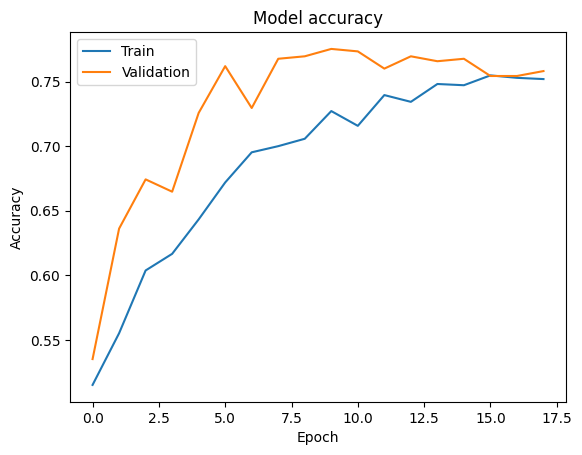

In [ ]:
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

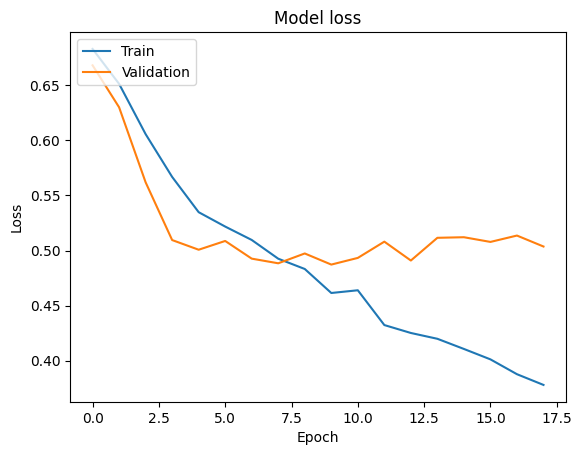

In [ ]:
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

36/36 [==============================] - 2s 47ms/step
[[363 146]
 [122 495]]
Accuracy 0.7619893428063943


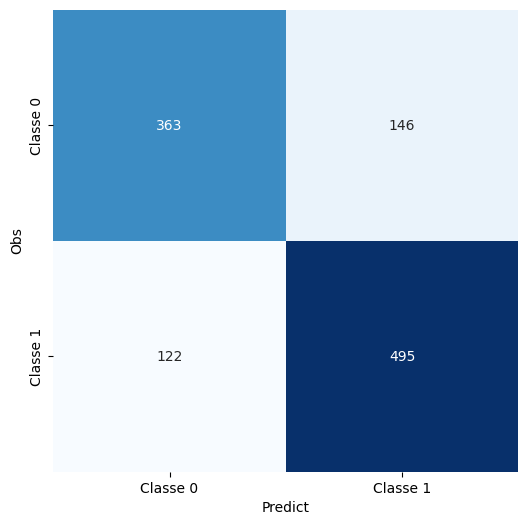

In [ ]:
# perfs sur le test:

X_test = pd.read_csv("X_test_15.csv")
y_test = pd.read_csv("y_test_15.csv")
y_pred_test_proba = model.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print("Accuracy", accuracy)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.debugging.disable_traceback_filtering()
model3 = Sequential()
model3.add(Conv1D(100,2, input_shape=(1533,1)))
model3.summary()
model3.load_weights("model_1.keras")

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_82 (Conv1D)          (None, 1532, 100)         300       
                                                                 
Total params: 300 (1.17 KB)
Trainable params: 300 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ValueError: ignored

### Random Search :

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
# Model to tune :
def cnn_to_tune(layers=1, filters=50, n_ker=2, n_unit_dense=300):
  # Define the input shape
  input_shape = (1112,1)

  model = Sequential()
  # Input layer :
  model.add(Conv1D(filters,n_ker , activation='relu', input_shape=input_shape,padding="same"
                   #kernel_initializer=initializers.Orthogonal()
                   ))

  model.add(MaxPooling1D())
  # Dropout because too much over fitting
  model.add(Dropout(0.5))

  for i in range(1, layers+1):
    filters +=5
    model.add(Conv1D(filters, n_ker,padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling1D())
    model.add(Dropout(0.5))

  # Flatten the layer:
  model.add(Flatten())

  model.add(Dense(n_unit_dense, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(1, activation='sigmoid')) # probability => log loss

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy']) #pas sure de la métriqued
  return model

In [ ]:
model_tune = KerasClassifier(build_fn=cnn_to_tune, layers=1, filters=10, n_ker=2, n_unit_dense=900, epochs=50, batch_size=100, verbose=2)
param_grid = {
    'layers': [2],
    'filters': [10,15,20,25],
    'n_ker': [3,4,5],
    'n_unit_dense': [900,1000,1200,1500]

}


In [ ]:
import joblib
grid_search = GridSearchCV(estimator=model_tune, param_grid=param_grid, cv=2, error_score='raise')
#grid_search_result = grid_search.fit(X_train, y_train)  # X_train et y_train sont vos données d'entraînement
try:
    grid_search_result = grid_search.fit(X_train, y_train)
    # Best paramters found :
    best_params = grid_search_result.best_params_
    print(best_params)
except KeyboardInterrupt:
    print("Recherche interrompue par l'utilisateur. Enregistrement de l'état actuel...")
    # Enregistrez l'objet RandomizedSearchCV à l'aide de joblib
    joblib.dump(grid_search, 'random_search_checkpoint2.pkl')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 0.9737 - accuracy: 0.5038 - 3s/epoch - 223ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5396 - 109ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6842 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6816 - accuracy: 0.5747 - 108ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6836 - accuracy: 0.5534 - 103ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6821 - accuracy: 0.5732 - 105ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6819 - accuracy: 0.5602 - 95ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5579 - 101ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6731 - accuracy: 0.5877 - 106ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6691 - accuracy: 0.6021 - 107ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6706 - accuracy: 0.5915 - 94ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6601 - accuracy: 0.5991 - 80ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6597 - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.5641 - accuracy: 0.5141 - 3s/epoch - 209ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6978 - accuracy: 0.4600 - 95ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6934 - accuracy: 0.4905 - 93ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6916 - accuracy: 0.5400 - 78ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6910 - accuracy: 0.5400 - 80ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5400 - 75ms/epoch - 5ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 79ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 79ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6889 - accuracy: 0.5347 - 78ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6860 - accuracy: 0.5407 - 70ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6884 - accuracy: 0.5537 - 71ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5590 - 72ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6790 - accuracy

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 0.9165 - accuracy: 0.5160 - 3s/epoch - 217ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6971 - accuracy: 0.4680 - 94ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6917 - accuracy: 0.5366 - 83ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5396 - 99ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6915 - accuracy: 0.5396 - 79ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6918 - accuracy: 0.5396 - 77ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5396 - 75ms/epoch - 5ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 75ms/epoch - 5ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5396 - 69ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5396 - 70ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5396 - 72ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6925 - accuracy: 0.5351 - 71ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6875

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.2236 - accuracy: 0.5491 - 3s/epoch - 225ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6867 - accuracy: 0.5400 - 115ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6876 - accuracy: 0.5415 - 120ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5484 - 101ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6846 - accuracy: 0.5659 - 104ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5750 - 103ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6836 - accuracy: 0.5621 - 102ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6772 - accuracy: 0.5910 - 89ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6819 - accuracy: 0.5636 - 74ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6766 - accuracy: 0.5819 - 72ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6635 - accuracy: 0.6177 - 80ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6804 - accuracy: 0.5750 - 71ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6800 - ac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1396 - accuracy: 0.5099 - 2s/epoch - 151ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5396 - 99ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5396 - 96ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6856 - accuracy: 0.5396 - 86ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5564 - 78ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6811 - accuracy: 0.5625 - 79ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6817 - accuracy: 0.5610 - 79ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6810 - accuracy: 0.5762 - 73ms/epoch - 5ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6807 - accuracy: 0.5724 - 81ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6870 - accuracy: 0.5297 - 76ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6781 - accuracy: 0.5556 - 81ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6844 - accuracy: 0.5663 - 72ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6809 - accuracy

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 1.2520 - accuracy: 0.5209 - 3s/epoch - 227ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6872 - accuracy: 0.5400 - 106ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6874 - accuracy: 0.5415 - 98ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5567 - 82ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5613 - 80ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6842 - accuracy: 0.5758 - 77ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6858 - accuracy: 0.5674 - 83ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6889 - accuracy: 0.5362 - 76ms/epoch - 5ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6820 - accuracy: 0.5666 - 73ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6800 - accuracy: 0.5735 - 70ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6779 - accuracy: 0.5750 - 73ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6701 - accuracy: 0.5880 - 78ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.666

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.2936 - accuracy: 0.5221 - 2s/epoch - 155ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5396 - 100ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5396 - 96ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5396 - 87ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6868 - accuracy: 0.5396 - 84ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6846 - accuracy: 0.5495 - 78ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6869 - accuracy: 0.5518 - 74ms/epoch - 5ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5541 - 85ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5457 - 80ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6845 - accuracy: 0.5648 - 77ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6816 - accuracy: 0.5556 - 80ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6762 - accuracy: 0.5663 - 78ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6846 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1177 - accuracy: 0.5141 - 2s/epoch - 152ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6882 - accuracy: 0.5491 - 103ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5453 - 108ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6883 - accuracy: 0.5392 - 84ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6855 - accuracy: 0.5506 - 90ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6791 - accuracy: 0.5743 - 78ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6844 - accuracy: 0.5651 - 81ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6809 - accuracy: 0.5758 - 87ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6769 - accuracy: 0.5994 - 74ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6791 - accuracy: 0.5529 - 77ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6748 - accuracy: 0.5735 - 75ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6708 - accuracy: 0.5864 - 77ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6725 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.8764 - accuracy: 0.4977 - 2s/epoch - 151ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5396 - 98ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6886 - accuracy: 0.5396 - 101ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6861 - accuracy: 0.5396 - 89ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6839 - accuracy: 0.5274 - 85ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5488 - 80ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5564 - 80ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6845 - accuracy: 0.5511 - 76ms/epoch - 5ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5755 - 73ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6811 - accuracy: 0.5648 - 87ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6911 - accuracy: 0.5450 - 74ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6807 - accuracy: 0.5678 - 76ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6745 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.9577 - accuracy: 0.5034 - 2s/epoch - 146ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5400 - 99ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6875 - accuracy: 0.5400 - 84ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5461 - 87ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6855 - accuracy: 0.5560 - 78ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6828 - accuracy: 0.5598 - 89ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6807 - accuracy: 0.5682 - 73ms/epoch - 5ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6826 - accuracy: 0.5735 - 73ms/epoch - 5ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6836 - accuracy: 0.5811 - 72ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6783 - accuracy: 0.5720 - 74ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6793 - accuracy: 0.5674 - 73ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6814 - accuracy: 0.5605 - 72ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6837 - accuracy

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0517 - accuracy: 0.5320 - 2s/epoch - 171ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6870 - accuracy: 0.5396 - 118ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5404 - 115ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6834 - accuracy: 0.5518 - 105ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6797 - accuracy: 0.5511 - 98ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6819 - accuracy: 0.5709 - 103ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6858 - accuracy: 0.5351 - 106ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6836 - accuracy: 0.5739 - 107ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6776 - accuracy: 0.5724 - 105ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5762 - 102ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6718 - accuracy: 0.5945 - 95ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6640 - accuracy: 0.6128 - 101ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6606 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.9320 - accuracy: 0.5248 - 2s/epoch - 150ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6874 - accuracy: 0.5400 - 99ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5407 - 85ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6864 - accuracy: 0.5514 - 88ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6840 - accuracy: 0.5697 - 78ms/epoch - 6ms/step
Epoch 6/50
14/14 - 1s - loss: 0.6941 - accuracy: 0.5750 - 714ms/epoch - 51ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6948 - accuracy: 0.5034 - 80ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6880 - accuracy: 0.5385 - 77ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5522 - 77ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5682 - 77ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6810 - accuracy: 0.5727 - 75ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6759 - accuracy: 0.5887 - 73ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6728 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.0009 - accuracy: 0.5419 - 3s/epoch - 223ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5396 - 122ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5396 - 105ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5396 - 98ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5396 - 102ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5373 - 102ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5419 - 110ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6826 - accuracy: 0.5488 - 107ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6803 - accuracy: 0.5640 - 99ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6779 - accuracy: 0.5762 - 108ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6766 - accuracy: 0.5556 - 105ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6788 - accuracy: 0.5686 - 116ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6703 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.9955 - accuracy: 0.5110 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5400 - 108ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6869 - accuracy: 0.5430 - 84ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6835 - accuracy: 0.5682 - 106ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5727 - 101ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6792 - accuracy: 0.5720 - 94ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6823 - accuracy: 0.5651 - 96ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6759 - accuracy: 0.5811 - 96ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6767 - accuracy: 0.5621 - 96ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6704 - accuracy: 0.6078 - 103ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6621 - accuracy: 0.5903 - 103ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6661 - accuracy: 0.6002 - 104ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6637 - ac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1271 - accuracy: 0.5053 - 2s/epoch - 158ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5396 - 109ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6867 - accuracy: 0.5396 - 102ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6864 - accuracy: 0.5434 - 90ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6853 - accuracy: 0.5579 - 92ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6887 - accuracy: 0.5534 - 79ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5549 - 80ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6842 - accuracy: 0.5709 - 84ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6812 - accuracy: 0.5595 - 81ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5587 - 85ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6811 - accuracy: 0.5678 - 81ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6802 - accuracy: 0.5732 - 78ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6830 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1239 - accuracy: 0.5225 - 2s/epoch - 154ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5392 - 112ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5392 - 93ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6883 - accuracy: 0.5369 - 103ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5583 - 97ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5590 - 82ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5491 - 78ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6874 - accuracy: 0.5621 - 85ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6801 - accuracy: 0.5903 - 80ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5636 - 78ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6819 - accuracy: 0.5666 - 79ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6856 - accuracy: 0.5430 - 83ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6793 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.4218 - accuracy: 0.5091 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5396 - 99ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5396 - 83ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6871 - accuracy: 0.5389 - 85ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5389 - 81ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6869 - accuracy: 0.5427 - 75ms/epoch - 5ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5564 - 75ms/epoch - 5ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6858 - accuracy: 0.5534 - 72ms/epoch - 5ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6864 - accuracy: 0.5480 - 86ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6863 - accuracy: 0.5442 - 77ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6814 - accuracy: 0.5663 - 73ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5480 - 72ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6823 - accuracy

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.3316 - accuracy: 0.4669 - 3s/epoch - 224ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6924 - accuracy: 0.5263 - 125ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5400 - 113ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5400 - 116ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5400 - 106ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 103ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 103ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 103ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5400 - 107ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5400 - 96ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 78ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5400 - 78ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6903 - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0802 - accuracy: 0.5023 - 2s/epoch - 149ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5396 - 98ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6850 - accuracy: 0.5396 - 101ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5633 - 84ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6816 - accuracy: 0.5572 - 82ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5572 - 76ms/epoch - 5ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6819 - accuracy: 0.5633 - 74ms/epoch - 5ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6762 - accuracy: 0.5800 - 79ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6732 - accuracy: 0.5884 - 81ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6720 - accuracy: 0.5838 - 71ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6787 - accuracy: 0.5701 - 73ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6594 - accuracy: 0.6037 - 71ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6550 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 1.1755 - accuracy: 0.4760 - 3s/epoch - 229ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6940 - accuracy: 0.4874 - 125ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6918 - accuracy: 0.5407 - 90ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5400 - 91ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6884 - accuracy: 0.5400 - 80ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5407 - 77ms/epoch - 5ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5636 - 77ms/epoch - 5ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6810 - accuracy: 0.5712 - 73ms/epoch - 5ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6864 - accuracy: 0.5644 - 76ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6839 - accuracy: 0.5659 - 73ms/epoch - 5ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6813 - accuracy: 0.5636 - 73ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6719 - accuracy: 0.6047 - 79ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.667

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0571 - accuracy: 0.5236 - 2s/epoch - 147ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 105ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5396 - 102ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5396 - 85ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5396 - 82ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5442 - 79ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6828 - accuracy: 0.5633 - 82ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5518 - 78ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6850 - accuracy: 0.5602 - 86ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6837 - accuracy: 0.5640 - 77ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5412 - 75ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6844 - accuracy: 0.5511 - 81ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6834 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.4903 - accuracy: 0.4890 - 2s/epoch - 152ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5385 - 103ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 99ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6880 - accuracy: 0.5423 - 93ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5499 - 86ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5598 - 81ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5499 - 83ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6785 - accuracy: 0.5750 - 76ms/epoch - 5ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6835 - accuracy: 0.5651 - 76ms/epoch - 5ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6750 - accuracy: 0.5956 - 81ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6826 - accuracy: 0.5811 - 75ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6775 - accuracy: 0.5743 - 77ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6786 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 0.9566 - accuracy: 0.5396 - 3s/epoch - 213ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6963 - accuracy: 0.4924 - 117ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6891 - accuracy: 0.5412 - 94ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6834 - accuracy: 0.5579 - 91ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5579 - 88ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5343 - 82ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6880 - accuracy: 0.5366 - 82ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6795 - accuracy: 0.5640 - 79ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6845 - accuracy: 0.5351 - 80ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6779 - accuracy: 0.5556 - 77ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6714 - accuracy: 0.5701 - 83ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6672 - accuracy: 0.5869 - 78ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.662

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.6047 - accuracy: 0.4981 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 101ms/epoch - 7ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5400 - 92ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6891 - accuracy: 0.5400 - 89ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6882 - accuracy: 0.5400 - 87ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5400 - 82ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6883 - accuracy: 0.5453 - 78ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6886 - accuracy: 0.5438 - 79ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6840 - accuracy: 0.5529 - 78ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6885 - accuracy: 0.5499 - 85ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6839 - accuracy: 0.5644 - 74ms/epoch - 5ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6846 - accuracy: 0.5727 - 76ms/epoch - 5ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6866 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 1.2483 - accuracy: 0.4649 - 2s/epoch - 175ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5381 - 109ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5396 - 92ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5396 - 88ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5419 - 83ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6807 - accuracy: 0.5739 - 86ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6817 - accuracy: 0.5739 - 81ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6823 - accuracy: 0.5678 - 81ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6801 - accuracy: 0.5732 - 88ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6731 - accuracy: 0.5838 - 91ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6704 - accuracy: 0.5877 - 81ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6756 - accuracy: 0.5854 - 79ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.650

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0895 - accuracy: 0.5156 - 2s/epoch - 154ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6872 - accuracy: 0.5400 - 107ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5407 - 91ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6863 - accuracy: 0.5438 - 91ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5628 - 96ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6836 - accuracy: 0.5796 - 82ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6846 - accuracy: 0.5621 - 87ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6862 - accuracy: 0.5674 - 88ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6783 - accuracy: 0.5682 - 80ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6794 - accuracy: 0.5712 - 90ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6733 - accuracy: 0.5796 - 92ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6690 - accuracy: 0.6062 - 81ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6731 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 0.9354 - accuracy: 0.5122 - 2s/epoch - 151ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5419 - 109ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6860 - accuracy: 0.5412 - 92ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6855 - accuracy: 0.5610 - 90ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6844 - accuracy: 0.5617 - 91ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6840 - accuracy: 0.5640 - 81ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5244 - 92ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6829 - accuracy: 0.5602 - 80ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6853 - accuracy: 0.5564 - 81ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6791 - accuracy: 0.5724 - 85ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6758 - accuracy: 0.5671 - 83ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6735 - accuracy: 0.5755 - 85ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.675

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 1.4556 - accuracy: 0.5118 - 2s/epoch - 166ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5400 - 109ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5400 - 91ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6882 - accuracy: 0.5400 - 90ms/epoch - 6ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6868 - accuracy: 0.5400 - 85ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5392 - 81ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6832 - accuracy: 0.5476 - 82ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6882 - accuracy: 0.5529 - 82ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5659 - 88ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6863 - accuracy: 0.5613 - 80ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6757 - accuracy: 0.5887 - 92ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6799 - accuracy: 0.5826 - 83ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.683

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 1.6535 - accuracy: 0.5175 - 3s/epoch - 202ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6868 - accuracy: 0.5396 - 115ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5396 - 97ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5396 - 97ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5457 - 93ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5655 - 81ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6830 - accuracy: 0.5617 - 84ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6825 - accuracy: 0.5678 - 87ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6820 - accuracy: 0.5518 - 83ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6838 - accuracy: 0.5724 - 84ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5549 - 91ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6779 - accuracy: 0.5572 - 81ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.676

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.1174 - accuracy: 0.5194 - 3s/epoch - 228ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6871 - accuracy: 0.5400 - 130ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6886 - accuracy: 0.5407 - 120ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6855 - accuracy: 0.5453 - 111ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6851 - accuracy: 0.5575 - 99ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6868 - accuracy: 0.5491 - 84ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6861 - accuracy: 0.5537 - 85ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6838 - accuracy: 0.5651 - 87ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5910 - 85ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6839 - accuracy: 0.5765 - 86ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6845 - accuracy: 0.5476 - 83ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6815 - accuracy: 0.5674 - 83ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6800 - accur

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.4663 - accuracy: 0.4954 - 2s/epoch - 148ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6966 - accuracy: 0.4611 - 111ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6929 - accuracy: 0.5061 - 98ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6914 - accuracy: 0.5389 - 98ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5396 - 85ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5396 - 98ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6910 - accuracy: 0.5396 - 92ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5404 - 91ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5396 - 85ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5389 - 87ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6871 - accuracy: 0.5412 - 91ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6886 - accuracy: 0.5450 - 88ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6916 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 1.1334 - accuracy: 0.5301 - 3s/epoch - 185ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6870 - accuracy: 0.5400 - 109ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5407 - 101ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6871 - accuracy: 0.5430 - 93ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5583 - 86ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6814 - accuracy: 0.5811 - 91ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6776 - accuracy: 0.5628 - 95ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6794 - accuracy: 0.5773 - 90ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6797 - accuracy: 0.5811 - 84ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6740 - accuracy: 0.5842 - 86ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6675 - accuracy: 0.6017 - 86ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6584 - accuracy: 0.6040 - 86ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.64

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 4s - loss: 1.0365 - accuracy: 0.5259 - 4s/epoch - 271ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5396 - 111ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6861 - accuracy: 0.5450 - 95ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5640 - 93ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6784 - accuracy: 0.5640 - 89ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6845 - accuracy: 0.5732 - 84ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6822 - accuracy: 0.5732 - 85ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6793 - accuracy: 0.5655 - 85ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6737 - accuracy: 0.5892 - 84ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6724 - accuracy: 0.6044 - 84ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6572 - accuracy: 0.6136 - 90ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6548 - accuracy: 0.6174 - 84ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.650

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.3941 - accuracy: 0.4966 - 2s/epoch - 158ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6949 - accuracy: 0.4593 - 112ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6928 - accuracy: 0.5050 - 93ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6916 - accuracy: 0.5400 - 103ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 85ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5400 - 87ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5385 - 85ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5415 - 90ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6847 - accuracy: 0.5491 - 91ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6915 - accuracy: 0.5392 - 90ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6887 - accuracy: 0.5347 - 84ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5529 - 87ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6838 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 1.0018 - accuracy: 0.4672 - 2s/epoch - 163ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6929 - accuracy: 0.5221 - 117ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6914 - accuracy: 0.5396 - 106ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5396 - 97ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6863 - accuracy: 0.5412 - 87ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5213 - 91ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6864 - accuracy: 0.5427 - 93ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6836 - accuracy: 0.5427 - 90ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5602 - 87ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6828 - accuracy: 0.5724 - 86ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6834 - accuracy: 0.5694 - 84ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6794 - accuracy: 0.5739 - 87ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.67

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 0.8406 - accuracy: 0.5316 - 3s/epoch - 181ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5400 - 117ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 93ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5400 - 95ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6882 - accuracy: 0.5400 - 89ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5385 - 85ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6815 - accuracy: 0.5712 - 96ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6925 - accuracy: 0.5347 - 89ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5689 - 85ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6732 - accuracy: 0.5864 - 85ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6663 - accuracy: 0.6040 - 87ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6633 - accuracy: 0.5979 - 94ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.656

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.2589 - accuracy: 0.4939 - 2s/epoch - 151ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6956 - accuracy: 0.4604 - 122ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6940 - accuracy: 0.4604 - 102ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6925 - accuracy: 0.5373 - 98ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6917 - accuracy: 0.5396 - 90ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5396 - 99ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5396 - 87ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6914 - accuracy: 0.5396 - 94ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5396 - 85ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5396 - 88ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5396 - 89ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 96ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6911 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.7607 - accuracy: 0.5209 - 2s/epoch - 154ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6915 - accuracy: 0.5248 - 114ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 96ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5385 - 96ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6884 - accuracy: 0.5392 - 89ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5385 - 87ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6812 - accuracy: 0.5583 - 88ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5773 - 88ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6944 - accuracy: 0.5506 - 95ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6785 - accuracy: 0.5895 - 92ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6769 - accuracy: 0.5765 - 88ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6756 - accuracy: 0.5796 - 87ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6832 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1729 - accuracy: 0.4695 - 2s/epoch - 150ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6912 - accuracy: 0.5396 - 123ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5396 - 97ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 93ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5396 - 112ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5396 - 107ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5290 - 110ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6847 - accuracy: 0.5579 - 112ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6885 - accuracy: 0.5495 - 103ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6868 - accuracy: 0.5564 - 100ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5473 - 102ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6787 - accuracy: 0.5694 - 101ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6802 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1132 - accuracy: 0.5209 - 2s/epoch - 152ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6876 - accuracy: 0.5400 - 129ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5407 - 110ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5430 - 106ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6850 - accuracy: 0.5407 - 92ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5659 - 93ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6809 - accuracy: 0.5773 - 94ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5689 - 91ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6777 - accuracy: 0.5796 - 96ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6691 - accuracy: 0.5765 - 90ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6740 - accuracy: 0.5804 - 125ms/epoch - 9ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6863 - accuracy: 0.5697 - 118ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6716 - acc

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.1605 - accuracy: 0.4962 - 3s/epoch - 181ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6869 - accuracy: 0.5396 - 122ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5396 - 128ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6858 - accuracy: 0.5343 - 117ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5678 - 104ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6844 - accuracy: 0.5572 - 99ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6799 - accuracy: 0.5716 - 93ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6759 - accuracy: 0.5777 - 91ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6787 - accuracy: 0.5640 - 97ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6789 - accuracy: 0.5732 - 95ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6776 - accuracy: 0.5770 - 103ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6681 - accuracy: 0.5915 - 95ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6630 - acc

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.2141 - accuracy: 0.5255 - 2s/epoch - 151ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5400 - 113ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5400 - 100ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6918 - accuracy: 0.5476 - 94ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5400 - 89ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5400 - 83ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5400 - 89ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5407 - 80ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6863 - accuracy: 0.5545 - 84ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6870 - accuracy: 0.5400 - 82ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6847 - accuracy: 0.5689 - 82ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6756 - accuracy: 0.5758 - 85ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6696 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 0.9323 - accuracy: 0.5015 - 2s/epoch - 149ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5396 - 107ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5396 - 101ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6867 - accuracy: 0.5419 - 95ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5495 - 93ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6847 - accuracy: 0.5442 - 82ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5549 - 84ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6828 - accuracy: 0.5534 - 92ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5518 - 88ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6820 - accuracy: 0.5602 - 82ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6752 - accuracy: 0.5770 - 88ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6566 - accuracy: 0.6280 - 84ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.65

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 0.9694 - accuracy: 0.4752 - 2s/epoch - 159ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6916 - accuracy: 0.5438 - 139ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5400 - 132ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5400 - 114ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 105ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5400 - 103ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6910 - accuracy: 0.5400 - 97ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5400 - 96ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5400 - 96ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5400 - 103ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6915 - accuracy: 0.5400 - 95ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5400 - 102ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0195 - accuracy: 0.4962 - 2s/epoch - 159ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5396 - 115ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6880 - accuracy: 0.5373 - 107ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6870 - accuracy: 0.5373 - 97ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6839 - accuracy: 0.5579 - 96ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6838 - accuracy: 0.5480 - 94ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5549 - 90ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6820 - accuracy: 0.5762 - 96ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6807 - accuracy: 0.5762 - 89ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6805 - accuracy: 0.5831 - 89ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5564 - 88ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6783 - accuracy: 0.5678 - 88ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6790 - accura

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.4228 - accuracy: 0.4829 - 2s/epoch - 151ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5354 - 111ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5354 - 97ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6870 - accuracy: 0.5354 - 95ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5491 - 96ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5369 - 93ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6930 - accuracy: 0.5088 - 87ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5468 - 93ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5286 - 90ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5423 - 88ms/epoch - 6ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5423 - 90ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5605 - 88ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6841 - accurac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1093 - accuracy: 0.5396 - 2s/epoch - 155ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 120ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5259 - 112ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5396 - 96ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5381 - 100ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6840 - accuracy: 0.5488 - 94ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6935 - accuracy: 0.5015 - 94ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6822 - accuracy: 0.5442 - 88ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6831 - accuracy: 0.5328 - 89ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6803 - accuracy: 0.5587 - 97ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6755 - accuracy: 0.5556 - 88ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6749 - accuracy: 0.5854 - 92ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6740 - accur

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.8363 - accuracy: 0.4958 - 2s/epoch - 156ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5377 - 128ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5362 - 113ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6864 - accuracy: 0.5537 - 111ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6875 - accuracy: 0.5385 - 102ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6850 - accuracy: 0.5522 - 90ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5354 - 96ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6822 - accuracy: 0.5537 - 94ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6842 - accuracy: 0.5430 - 93ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6717 - accuracy: 0.5758 - 93ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6449 - accuracy: 0.6329 - 89ms/epoch - 6ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6643 - accuracy: 0.6024 - 93ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6469 - accu

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1985 - accuracy: 0.4985 - 2s/epoch - 149ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6867 - accuracy: 0.5396 - 123ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6874 - accuracy: 0.5396 - 100ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5404 - 95ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5587 - 90ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6825 - accuracy: 0.5602 - 90ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5640 - 94ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6785 - accuracy: 0.5694 - 90ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6797 - accuracy: 0.5777 - 91ms/epoch - 6ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5785 - 101ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6752 - accuracy: 0.5671 - 91ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6700 - accuracy: 0.6227 - 95ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6669 - accur

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.4416 - accuracy: 0.5209 - 3s/epoch - 196ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6954 - accuracy: 0.4600 - 142ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6933 - accuracy: 0.4943 - 135ms/epoch - 10ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6911 - accuracy: 0.5400 - 118ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6882 - accuracy: 0.5407 - 111ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6856 - accuracy: 0.5453 - 105ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6922 - accuracy: 0.5286 - 114ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6875 - accuracy: 0.5446 - 110ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5514 - 119ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5552 - 111ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6874 - accuracy: 0.5560 - 109ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6816 - accuracy: 0.5621 - 114ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.68

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.9722 - accuracy: 0.5206 - 2s/epoch - 150ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5396 - 124ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5412 - 100ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6822 - accuracy: 0.5648 - 101ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6796 - accuracy: 0.5800 - 101ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6842 - accuracy: 0.5572 - 94ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6766 - accuracy: 0.5709 - 93ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6769 - accuracy: 0.5793 - 90ms/epoch - 6ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6764 - accuracy: 0.5945 - 92ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6686 - accuracy: 0.5892 - 96ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6678 - accuracy: 0.5800 - 92ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6554 - accuracy: 0.6174 - 89ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6580 - accu

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1990 - accuracy: 0.5362 - 2s/epoch - 151ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5400 - 115ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5423 - 97ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6883 - accuracy: 0.5514 - 100ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6869 - accuracy: 0.5567 - 90ms/epoch - 6ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6824 - accuracy: 0.5636 - 90ms/epoch - 6ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6802 - accuracy: 0.5765 - 95ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6830 - accuracy: 0.5605 - 109ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6727 - accuracy: 0.5857 - 93ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6758 - accuracy: 0.5872 - 94ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6738 - accuracy: 0.5765 - 96ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6657 - accuracy: 0.6009 - 90ms/epoch - 6ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6686 - accur

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 1.0138 - accuracy: 0.5412 - 2s/epoch - 152ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6925 - accuracy: 0.5236 - 127ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5396 - 102ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5396 - 105ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6871 - accuracy: 0.5396 - 94ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5396 - 97ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5503 - 96ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6840 - accuracy: 0.5610 - 99ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6842 - accuracy: 0.5396 - 96ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5366 - 92ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6880 - accuracy: 0.5328 - 99ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6786 - accuracy: 0.5572 - 102ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.3821 - accuracy: 0.5057 - 3s/epoch - 221ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5400 - 154ms/epoch - 11ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5400 - 123ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5400 - 118ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5400 - 115ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5400 - 122ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5400 - 117ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6837 - accuracy: 0.5446 - 120ms/epoch - 9ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6811 - accuracy: 0.5697 - 118ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6855 - accuracy: 0.5499 - 117ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5476 - 111ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5567 - 113ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.681

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.6138 - accuracy: 0.4779 - 2s/epoch - 159ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6862 - accuracy: 0.5396 - 120ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5389 - 116ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5412 - 112ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6855 - accuracy: 0.5351 - 100ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6821 - accuracy: 0.5526 - 100ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6795 - accuracy: 0.5747 - 103ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5625 - 102ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6835 - accuracy: 0.5716 - 99ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6811 - accuracy: 0.5739 - 100ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6760 - accuracy: 0.5648 - 108ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6824 - accuracy: 0.5549 - 108ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6793 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.6166 - accuracy: 0.5149 - 2s/epoch - 156ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5628 - 134ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5415 - 122ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5484 - 110ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6832 - accuracy: 0.5674 - 101ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6758 - accuracy: 0.5963 - 98ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6796 - accuracy: 0.5849 - 100ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6779 - accuracy: 0.5788 - 104ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6720 - accuracy: 0.5895 - 103ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6657 - accuracy: 0.6047 - 112ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6684 - accuracy: 0.5994 - 104ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6522 - accuracy: 0.6276 - 102ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6538

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.9012 - accuracy: 0.5130 - 2s/epoch - 155ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5412 - 128ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6864 - accuracy: 0.5518 - 105ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6817 - accuracy: 0.5442 - 101ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6846 - accuracy: 0.5534 - 97ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6876 - accuracy: 0.5595 - 100ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6889 - accuracy: 0.5518 - 101ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6882 - accuracy: 0.5465 - 102ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5511 - 98ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6912 - accuracy: 0.5191 - 101ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6880 - accuracy: 0.5450 - 95ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5396 - 97ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6851 - a

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1216 - accuracy: 0.4890 - 2s/epoch - 157ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5400 - 120ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5400 - 106ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6846 - accuracy: 0.5468 - 101ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5514 - 101ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5560 - 96ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6820 - accuracy: 0.5765 - 99ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6810 - accuracy: 0.5727 - 97ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6749 - accuracy: 0.5727 - 97ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6844 - accuracy: 0.5590 - 101ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6816 - accuracy: 0.5842 - 110ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6714 - accuracy: 0.5842 - 99ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6694 - ac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.2320 - accuracy: 0.5206 - 3s/epoch - 218ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5381 - 144ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5412 - 131ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5434 - 126ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6846 - accuracy: 0.5381 - 120ms/epoch - 9ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6867 - accuracy: 0.5404 - 114ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6870 - accuracy: 0.5389 - 129ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6799 - accuracy: 0.5625 - 115ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6823 - accuracy: 0.5648 - 117ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5320 - 115ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6840 - accuracy: 0.5450 - 112ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6821 - accuracy: 0.5579 - 102ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.678

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.4543 - accuracy: 0.4935 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5400 - 119ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 117ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 126ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 114ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5400 - 114ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5400 - 112ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5400 - 119ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5407 - 108ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5308 - 121ms/epoch - 9ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6837 - accuracy: 0.5369 - 109ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6875 - accuracy: 0.5484 - 110ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6881

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.3155 - accuracy: 0.4886 - 2s/epoch - 152ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5396 - 137ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5396 - 114ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5396 - 114ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5396 - 99ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6847 - accuracy: 0.5396 - 107ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5465 - 97ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5473 - 103ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6858 - accuracy: 0.5534 - 100ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6886 - accuracy: 0.5351 - 98ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6874 - accuracy: 0.5442 - 101ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5465 - 103ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6837 -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.3257 - accuracy: 0.5126 - 3s/epoch - 219ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5407 - 146ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6875 - accuracy: 0.5400 - 129ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5583 - 115ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6844 - accuracy: 0.5590 - 113ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6914 - accuracy: 0.5545 - 121ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6883 - accuracy: 0.5529 - 117ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6882 - accuracy: 0.5674 - 112ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5682 - 122ms/epoch - 9ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6788 - accuracy: 0.5704 - 132ms/epoch - 9ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6810 - accuracy: 0.5758 - 107ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6785 - accuracy: 0.5697 - 98ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6723

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0783 - accuracy: 0.5244 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5396 - 128ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5396 - 123ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6858 - accuracy: 0.5419 - 105ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6864 - accuracy: 0.5617 - 102ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5465 - 105ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6832 - accuracy: 0.5686 - 105ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6828 - accuracy: 0.5534 - 106ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6774 - accuracy: 0.5800 - 108ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6698 - accuracy: 0.5854 - 104ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6676 - accuracy: 0.5838 - 117ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6500 - accuracy: 0.6311 - 115ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6394

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 0.9985 - accuracy: 0.5149 - 2s/epoch - 169ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6964 - accuracy: 0.4600 - 123ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6934 - accuracy: 0.4737 - 121ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6919 - accuracy: 0.5400 - 107ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6910 - accuracy: 0.5400 - 101ms/epoch - 7ms/step
Epoch 6/50
14/14 - 1s - loss: 0.6910 - accuracy: 0.5400 - 763ms/epoch - 55ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5400 - 106ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5400 - 106ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5400 - 101ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 113ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5400 - 109ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5400 - 106ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.0720 - accuracy: 0.5137 - 3s/epoch - 187ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6926 - accuracy: 0.5312 - 144ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6912 - accuracy: 0.5396 - 124ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5396 - 119ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5396 - 121ms/epoch - 9ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5396 - 129ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5396 - 127ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6919 - accuracy: 0.5396 - 106ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5396 - 112ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6881 - accuracy: 0.5396 - 109ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6865 - accuracy: 0.5396 - 108ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6932 - accuracy: 0.5389 - 110ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.692

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.2198 - accuracy: 0.5042 - 2s/epoch - 157ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5400 - 113ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5400 - 112ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5506 - 93ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6840 - accuracy: 0.5674 - 106ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6881 - accuracy: 0.5407 - 97ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6866 - accuracy: 0.5598 - 93ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6802 - accuracy: 0.5704 - 102ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6827 - accuracy: 0.5605 - 98ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6807 - accuracy: 0.5674 - 96ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6678 - accuracy: 0.6093 - 92ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6757 - accuracy: 0.5941 - 95ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6722 - accu

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0900 - accuracy: 0.5038 - 2s/epoch - 154ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5396 - 119ms/epoch - 8ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5396 - 102ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 97ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 104ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 94ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5396 - 95ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 93ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5396 - 93ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6910 - accuracy: 0.5396 - 100ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5396 - 99ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6902 - acc

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0464 - accuracy: 0.5141 - 2s/epoch - 158ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5324 - 122ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6876 - accuracy: 0.5339 - 102ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5407 - 101ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6923 - accuracy: 0.5164 - 93ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6862 - accuracy: 0.5392 - 106ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6815 - accuracy: 0.5857 - 96ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6781 - accuracy: 0.5811 - 101ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5255 - 98ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6778 - accuracy: 0.5560 - 94ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6641 - accuracy: 0.5948 - 97ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6730 - accuracy: 0.5963 - 99ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6595 - acc

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.7392 - accuracy: 0.5175 - 2s/epoch - 154ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6936 - accuracy: 0.5381 - 126ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6786 - accuracy: 0.5724 - 108ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6749 - accuracy: 0.5762 - 103ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6732 - accuracy: 0.6014 - 102ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6526 - accuracy: 0.6425 - 100ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6458 - accuracy: 0.6486 - 99ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6392 - accuracy: 0.6585 - 103ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6260 - accuracy: 0.6654 - 101ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6253 - accuracy: 0.6631 - 97ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6106 - accuracy: 0.6753 - 97ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6069 - accuracy: 0.6898 - 102ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.5911 - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1886 - accuracy: 0.4806 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5400 - 132ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6881 - accuracy: 0.5400 - 112ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6886 - accuracy: 0.5385 - 105ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6911 - accuracy: 0.5308 - 97ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6920 - accuracy: 0.5369 - 96ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5400 - 104ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6866 - accuracy: 0.5369 - 96ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5491 - 100ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5301 - 99ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6867 - accuracy: 0.5484 - 100ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6823 - accuracy: 0.5712 - 96ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6837 - ac

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 0.9388 - accuracy: 0.4825 - 3s/epoch - 226ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 162ms/epoch - 12ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5396 - 135ms/epoch - 10ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5396 - 125ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 125ms/epoch - 9ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5396 - 119ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5396 - 122ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5396 - 118ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 129ms/epoch - 9ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 116ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 133ms/epoch - 10ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 126ms/epoch - 9ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0564 - accuracy: 0.5324 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5400 - 133ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5400 - 120ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 111ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 104ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5400 - 107ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6887 - accuracy: 0.5438 - 110ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6943 - accuracy: 0.4775 - 110ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5400 - 105ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5400 - 100ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 105ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5400 - 101ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.689

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 0.9704 - accuracy: 0.5038 - 2s/epoch - 175ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5396 - 133ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6889 - accuracy: 0.5396 - 110ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5396 - 109ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5488 - 103ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5434 - 102ms/epoch - 7ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6841 - accuracy: 0.5549 - 104ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5183 - 103ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6800 - accuracy: 0.5640 - 105ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6781 - accuracy: 0.5922 - 108ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5297 - 116ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6835 - accuracy: 0.5922 - 102ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - l

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.2105 - accuracy: 0.4829 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6935 - accuracy: 0.4912 - 123ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6919 - accuracy: 0.5400 - 113ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5400 - 106ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5400 - 123ms/epoch - 9ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6866 - accuracy: 0.5385 - 126ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6872 - accuracy: 0.5484 - 129ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6853 - accuracy: 0.5438 - 120ms/epoch - 9ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6799 - accuracy: 0.5605 - 119ms/epoch - 9ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6812 - accuracy: 0.5842 - 117ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5537 - 122ms/epoch - 9ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6802 - accuracy: 0.5864 - 116ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6659

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.0264 - accuracy: 0.5015 - 3s/epoch - 211ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5381 - 133ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6891 - accuracy: 0.5396 - 104ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5381 - 107ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5351 - 111ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5373 - 108ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6885 - accuracy: 0.5282 - 105ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5427 - 107ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6856 - accuracy: 0.5465 - 107ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6821 - accuracy: 0.5701 - 111ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6867 - accuracy: 0.5480 - 109ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6805

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 2s - loss: 1.0897 - accuracy: 0.5377 - 2s/epoch - 158ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6875 - accuracy: 0.5400 - 140ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5400 - 118ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6878 - accuracy: 0.5400 - 114ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6941 - accuracy: 0.5072 - 113ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5362 - 108ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5446 - 110ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6839 - accuracy: 0.5491 - 104ms/epoch - 7ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6845 - accuracy: 0.5628 - 105ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6856 - accuracy: 0.5537 - 106ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6814 - accuracy: 0.5704 - 105ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6803 - accuracy: 0.5628 - 102ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.5607 - accuracy: 0.5099 - 3s/epoch - 185ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6963 - accuracy: 0.4604 - 167ms/epoch - 12ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6940 - accuracy: 0.4604 - 149ms/epoch - 11ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6924 - accuracy: 0.5290 - 133ms/epoch - 10ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5396 - 127ms/epoch - 9ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5396 - 135ms/epoch - 10ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 122ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 124ms/epoch - 9ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6871 - accuracy: 0.5396 - 136ms/epoch - 10ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5389 - 132ms/epoch - 9ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6910 - accuracy: 0.5381 - 127ms/epoch - 9ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6842 - accuracy: 0.5412 - 132ms/epoch - 9ms/step
Epoch 13/50
14/14 - 0s - loss: 0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1554 - accuracy: 0.4958 - 2s/epoch - 158ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6948 - accuracy: 0.4730 - 125ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6915 - accuracy: 0.5400 - 118ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5400 - 112ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5400 - 109ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5400 - 118ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5400 - 110ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6911 - accuracy: 0.5400 - 107ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 109ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 112ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5400 - 110ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5400 - 116ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6910

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 1.4447 - accuracy: 0.4947 - 3s/epoch - 186ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5396 - 137ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 119ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5396 - 112ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6892 - accuracy: 0.5396 - 112ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6877 - accuracy: 0.5396 - 114ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5404 - 113ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5396 - 111ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5450 - 110ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6847 - accuracy: 0.5518 - 109ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6847 - accuracy: 0.5511 - 112ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 1.5053 - accuracy: 0.5118 - 3s/epoch - 218ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6948 - accuracy: 0.4836 - 134ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5385 - 123ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5347 - 113ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5522 - 112ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6852 - accuracy: 0.5491 - 114ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6883 - accuracy: 0.5567 - 111ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6872 - accuracy: 0.5468 - 116ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6834 - accuracy: 0.5567 - 121ms/epoch - 9ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6808 - accuracy: 0.5682 - 112ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6911 - accuracy: 0.5453 - 112ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5727 - 111ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0676 - accuracy: 0.5076 - 2s/epoch - 154ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6917 - accuracy: 0.5351 - 135ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6862 - accuracy: 0.5389 - 119ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6860 - accuracy: 0.5442 - 114ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6867 - accuracy: 0.5427 - 111ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6875 - accuracy: 0.5503 - 118ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6821 - accuracy: 0.5610 - 109ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5267 - 111ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5396 - 109ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5198 - 135ms/epoch - 10ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6886 - accuracy: 0.5389 - 124ms/epoch - 9ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6848 - accuracy: 0.5442 - 122ms/epoch - 9ms/step
Epoch 13/50
14/14 - 0s - loss: 0.68

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0610 - accuracy: 0.4745 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6912 - accuracy: 0.5400 - 149ms/epoch - 11ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 129ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6880 - accuracy: 0.5400 - 115ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6868 - accuracy: 0.5407 - 109ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6862 - accuracy: 0.5499 - 112ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6833 - accuracy: 0.5674 - 109ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6854 - accuracy: 0.5605 - 114ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6856 - accuracy: 0.5659 - 106ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5529 - 114ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6851 - accuracy: 0.5743 - 107ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6819 - accuracy: 0.5819 - 107ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.679

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0548 - accuracy: 0.5038 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5396 - 144ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6916 - accuracy: 0.5396 - 117ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6894 - accuracy: 0.5396 - 119ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5396 - 105ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6861 - accuracy: 0.5366 - 110ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6914 - accuracy: 0.5488 - 115ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6923 - accuracy: 0.5381 - 107ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6910 - accuracy: 0.5396 - 109ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5396 - 107ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5396 - 110ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5396 - 104ms/epoch - 7ms/step
Epoch 13/50
14/14 - 0s - loss: 0.690

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.2558 - accuracy: 0.5286 - 3s/epoch - 201ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6936 - accuracy: 0.4844 - 158ms/epoch - 11ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5400 - 134ms/epoch - 10ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5400 - 140ms/epoch - 10ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5400 - 122ms/epoch - 9ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5400 - 119ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5400 - 126ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6884 - accuracy: 0.5400 - 129ms/epoch - 9ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5347 - 124ms/epoch - 9ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5400 - 123ms/epoch - 9ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6886 - accuracy: 0.5423 - 121ms/epoch - 9ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6860 - accuracy: 0.5484 - 123ms/epoch - 9ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.1578 - accuracy: 0.5145 - 3s/epoch - 213ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6939 - accuracy: 0.4939 - 149ms/epoch - 11ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6912 - accuracy: 0.5381 - 127ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 124ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5396 - 117ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5396 - 121ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5396 - 119ms/epoch - 9ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 116ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6912 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6911 - accuracy: 0.5396 - 126ms/epoch - 9ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5396 - 116ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.690

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.1548 - accuracy: 0.5141 - 2s/epoch - 161ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6945 - accuracy: 0.4653 - 138ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5316 - 129ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6845 - accuracy: 0.5461 - 111ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6885 - accuracy: 0.5560 - 113ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6837 - accuracy: 0.5560 - 130ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5727 - 121ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6861 - accuracy: 0.5400 - 118ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6890 - accuracy: 0.5415 - 111ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6793 - accuracy: 0.5666 - 115ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6755 - accuracy: 0.5819 - 113ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6760 - accuracy: 0.5925 - 113ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.660

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.6337 - accuracy: 0.5206 - 3s/epoch - 237ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6915 - accuracy: 0.5175 - 156ms/epoch - 11ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5427 - 155ms/epoch - 11ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6832 - accuracy: 0.5617 - 150ms/epoch - 11ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5511 - 138ms/epoch - 10ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6835 - accuracy: 0.5556 - 135ms/epoch - 10ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6834 - accuracy: 0.5755 - 136ms/epoch - 10ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6811 - accuracy: 0.5671 - 148ms/epoch - 11ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6795 - accuracy: 0.5602 - 144ms/epoch - 10ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6739 - accuracy: 0.5747 - 137ms/epoch - 10ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6829 - accuracy: 0.5633 - 140ms/epoch - 10ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6797 - accuracy: 0.5694 - 122ms/epoch - 9ms/step
Epoch 13/50
14/14 - 0s - lo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.5233 - accuracy: 0.5072 - 2s/epoch - 155ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6873 - accuracy: 0.5400 - 133ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5400 - 132ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5407 - 121ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6875 - accuracy: 0.5476 - 119ms/epoch - 9ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6818 - accuracy: 0.5476 - 118ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6866 - accuracy: 0.5560 - 121ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6816 - accuracy: 0.5750 - 122ms/epoch - 9ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6827 - accuracy: 0.5636 - 123ms/epoch - 9ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6774 - accuracy: 0.5826 - 129ms/epoch - 9ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6740 - accuracy: 0.6009 - 121ms/epoch - 9ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6760 - accuracy: 0.5986 - 123ms/epoch - 9ms/step
Epoch 13/50
14/14 - 0s - loss: 0.668

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0617 - accuracy: 0.5198 - 2s/epoch - 158ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6858 - accuracy: 0.5396 - 142ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5389 - 115ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6888 - accuracy: 0.5404 - 115ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6843 - accuracy: 0.5389 - 107ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6857 - accuracy: 0.5404 - 113ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6862 - accuracy: 0.5290 - 115ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6881 - accuracy: 0.5335 - 114ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6866 - accuracy: 0.5389 - 109ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6870 - accuracy: 0.5427 - 110ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6855 - accuracy: 0.5419 - 110ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6826 - accuracy: 0.5480 - 105ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.679

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.0333 - accuracy: 0.5050 - 2s/epoch - 152ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6871 - accuracy: 0.5400 - 146ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6918 - accuracy: 0.5385 - 118ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5400 - 116ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 104ms/epoch - 7ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6898 - accuracy: 0.5400 - 112ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 102ms/epoch - 7ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6903 - accuracy: 0.5400 - 112ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5400 - 111ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 104ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5400 - 103ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5400 - 107ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.690

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.1287 - accuracy: 0.4779 - 3s/epoch - 225ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6900 - accuracy: 0.5396 - 148ms/epoch - 11ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5396 - 140ms/epoch - 10ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 126ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 128ms/epoch - 9ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5396 - 111ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5396 - 111ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 108ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 108ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5396 - 109ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6907 - accuracy: 0.5396 - 108ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5396 - 110ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.68

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.3720 - accuracy: 0.5019 - 2s/epoch - 153ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5400 - 138ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5400 - 118ms/epoch - 8ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5400 - 103ms/epoch - 7ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5400 - 113ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6897 - accuracy: 0.5400 - 114ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5400 - 107ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6887 - accuracy: 0.5400 - 107ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6896 - accuracy: 0.5385 - 107ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6891 - accuracy: 0.5415 - 116ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6879 - accuracy: 0.5400 - 116ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6849 - accuracy: 0.5499 - 117ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.683

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 0.9146 - accuracy: 0.4947 - 2s/epoch - 154ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6913 - accuracy: 0.5389 - 132ms/epoch - 9ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5396 - 125ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5396 - 112ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 109ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5396 - 110ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5396 - 117ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5396 - 114ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5396 - 111ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5396 - 113ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.6909

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
14/14 - 3s - loss: 1.1544 - accuracy: 0.5050 - 3s/epoch - 192ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5400 - 151ms/epoch - 11ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5415 - 122ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6893 - accuracy: 0.5430 - 128ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6919 - accuracy: 0.5362 - 113ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6905 - accuracy: 0.5430 - 118ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6904 - accuracy: 0.5407 - 115ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5491 - 115ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5369 - 107ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6914 - accuracy: 0.5392 - 118ms/epoch - 8ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6916 - accuracy: 0.5407 - 111ms/epoch - 8ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5400 - 113ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 2s - loss: 1.4164 - accuracy: 0.5297 - 2s/epoch - 154ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6952 - accuracy: 0.4604 - 142ms/epoch - 10ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6932 - accuracy: 0.5008 - 127ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6910 - accuracy: 0.5396 - 123ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6895 - accuracy: 0.5396 - 141ms/epoch - 10ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6899 - accuracy: 0.5396 - 135ms/epoch - 10ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6908 - accuracy: 0.5396 - 137ms/epoch - 10ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6901 - accuracy: 0.5396 - 129ms/epoch - 9ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6915 - accuracy: 0.5396 - 135ms/epoch - 10ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6902 - accuracy: 0.5396 - 134ms/epoch - 10ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6909 - accuracy: 0.5396 - 143ms/epoch - 10ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6906 - accuracy: 0.5396 - 139ms/epoch - 10ms/step
Epoch 13/50
14/14 - 0s - loss

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


14/14 - 3s - loss: 1.1599 - accuracy: 0.5171 - 3s/epoch - 217ms/step
Epoch 2/50
14/14 - 0s - loss: 0.6846 - accuracy: 0.5461 - 153ms/epoch - 11ms/step
Epoch 3/50
14/14 - 0s - loss: 0.6832 - accuracy: 0.5621 - 127ms/epoch - 9ms/step
Epoch 4/50
14/14 - 0s - loss: 0.6866 - accuracy: 0.5529 - 117ms/epoch - 8ms/step
Epoch 5/50
14/14 - 0s - loss: 0.6859 - accuracy: 0.5514 - 115ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.6837 - accuracy: 0.5590 - 116ms/epoch - 8ms/step
Epoch 7/50
14/14 - 0s - loss: 0.6803 - accuracy: 0.5750 - 121ms/epoch - 9ms/step
Epoch 8/50
14/14 - 0s - loss: 0.6775 - accuracy: 0.5674 - 120ms/epoch - 9ms/step
Epoch 9/50
14/14 - 0s - loss: 0.6806 - accuracy: 0.5537 - 116ms/epoch - 8ms/step
Epoch 10/50
14/14 - 0s - loss: 0.6611 - accuracy: 0.6154 - 120ms/epoch - 9ms/step
Epoch 11/50
14/14 - 0s - loss: 0.6580 - accuracy: 0.6131 - 120ms/epoch - 9ms/step
Epoch 12/50
14/14 - 0s - loss: 0.6666 - accuracy: 0.6131 - 123ms/epoch - 9ms/step
Epoch 13/50
14/14 - 0s - loss: 0.633

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
27/27 - 3s - loss: 0.8485 - accuracy: 0.5261 - 3s/epoch - 97ms/step
Epoch 2/50
27/27 - 0s - loss: 0.6900 - accuracy: 0.5398 - 206ms/epoch - 8ms/step
Epoch 3/50
27/27 - 0s - loss: 0.6895 - accuracy: 0.5398 - 184ms/epoch - 7ms/step
Epoch 4/50
27/27 - 0s - loss: 0.6890 - accuracy: 0.5486 - 182ms/epoch - 7ms/step
Epoch 5/50
27/27 - 0s - loss: 0.6821 - accuracy: 0.5486 - 189ms/epoch - 7ms/step
Epoch 6/50
27/27 - 0s - loss: 0.6755 - accuracy: 0.5745 - 179ms/epoch - 7ms/step
Epoch 7/50
27/27 - 0s - loss: 0.6715 - accuracy: 0.5794 - 185ms/epoch - 7ms/step
Epoch 8/50
27/27 - 0s - loss: 0.6563 - accuracy: 0.6008 - 182ms/epoch - 7ms/step
Epoch 9/50
27/27 - 0s - loss: 0.6482 - accuracy: 0.6404 - 185ms/epoch - 7ms/step
Epoch 10/50
27/27 - 0s - loss: 0.6358 - accuracy: 0.6491 - 190ms/epoch - 7ms/step
Epoch 11/50
27/27 - 0s - loss: 0.6330 - accuracy: 0.6442 - 191ms/epoch - 7ms/step
Epoch 12/50
27/27 - 0s - loss: 0.6310 - accuracy: 0.6602 - 189ms/epoch - 7ms/step
Epoch 13/50
27/27 - 0s - lo

In [ ]:
# Best paramters found :
best_params = grid_search_result.best_params_
print(best_params)


{'filters': 20, 'layers': 2, 'n_ker': 4, 'n_unit_dense': 1000}


In [ ]:
# Training the model longer taking into account the best HP founded by grid search:
model_tuned = cnn_to_tune(layers=2, filters=30, n_ker=3, n_unit_dense=512)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)
history_tuned = model_tuned.fit(X_train, y_train, validation_split = 0.2, epochs=200, batch_size=200, callbacks=early_stopping)# partir de 30 epochs surapprentuissage visibke


Epoch 1/200
11/11 [==============================] - 14s 1s/step - loss: 1.1089 - accuracy: 0.4905 - val_loss: 0.6923 - val_accuracy: 0.5352
Epoch 2/200
 4/11 [=========>....................] - ETA: 7s - loss: 0.6865 - accuracy: 0.5700

KeyboardInterrupt: ignored

36/36 [==============================] - 0s 2ms/step
[[341 168]
 [100 517]]
Accuracy 0.7619893428063943


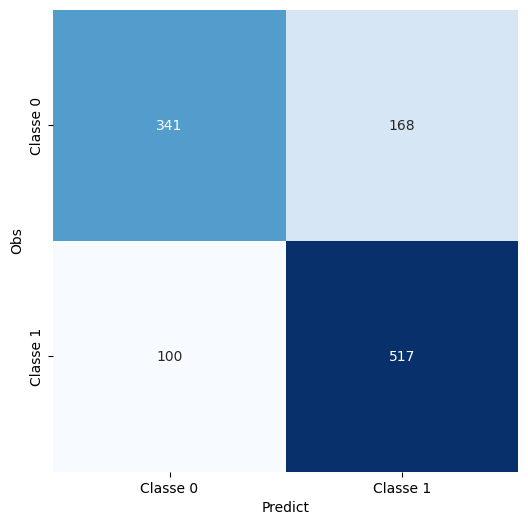

In [ ]:
# perfs sur le test:

X_test = pd.read_csv("X_test_1.csv")
y_test = pd.read_csv("y_test_1.csv")
y_pred_test_proba = model_tuned.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print("Accuracy", accuracy)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()


In [ ]:
model_2 = tf.keras.models.load_model("model_1.keras")

ValueError: ignored

In [ ]:
from keras.src.layers.attention.multi_head_attention import activation
model_manual = tf.keras.models.load_model("model_1.keras")
# Remove the last layer from the model
# model_manual.pop()
# model_manual.add(Dropout(0.5, name="drop_8"))
# model_manual.add(Dense(256, activation = "relu"))
# model_manual.add(Dropout(0.5, name="drop_9"))
# model_manual.add(Dense(128, activation = "relu"))


# model_manual.add(Dense(1, activation = "sigmoid"))


# Change the learning rate of the optimizer
optimizer = Adam(lr=0.005)#0.001 pas mal et 0.005

# Compile the model with the updated optimizer
model_manual.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print(model_manual.summary())
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history_manual = model_manual.fit(X_train, y_train, validation_split = 0.2, epochs=20, batch_size=200, callbacks=early_stopping)# partir de 30 epochs surapprentuissage visibke


ValueError: ignored

36/36 [==============================] - 5s 122ms/step
[[360 149]
 [ 84 533]]
Accuracy 0.7930728241563055


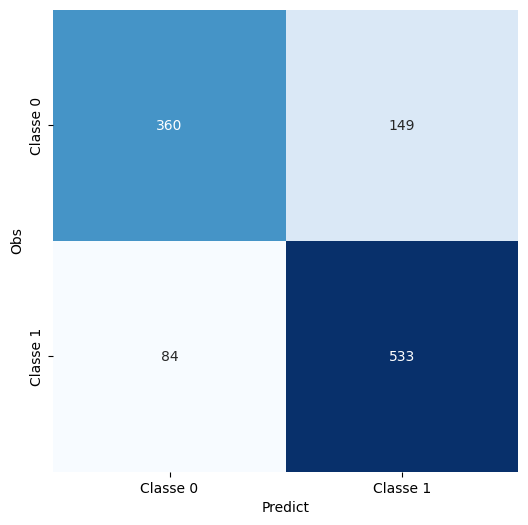

In [ ]:

X_test = pd.read_csv("X_test_1.csv")
y_test = pd.read_csv("y_test_1.csv")
y_pred_test_proba = model_manual.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print("Accuracy", accuracy)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()


Pour le moment le meilleur atteint est 0.79 en accuracy sur le test (model sauvé sous le nom de model_1 mais surapprentissage important

In [ ]:
model_manual.layers[0].kernel_size
model_manual.layers[0].filters

model_manual.layers[1].kernel_size
model_manual.layers[1].filters

model_manual.layers[2].kernel_size
model_manual.layers[2].filters

NameError: ignored

https://github.com/ZFTurbo/classification_models_1D

In [ ]:
model_manual.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1110, 78)          312       
                                                                 
 max_pooling1d (MaxPooling1  (None, 555, 78)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 555, 78)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 553, 156)          36660     
                                                                 
 batch_normalization (Batch  (None, 553, 156)          624       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 553, 156)          0

In [ ]:
model_manual.save("model_1.keras")

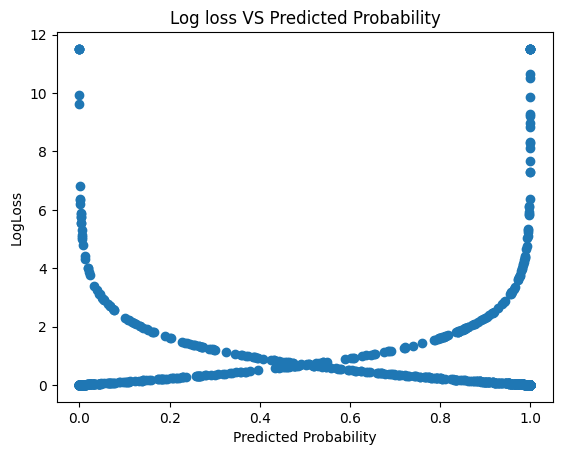

In [ ]:
#Plotting log loss and predicted probability
plt.scatter(y=log_losses, x = y_pred_test_proba)
plt.title('Log loss VS Predicted Probability')
plt.ylabel('LogLoss')
plt.xlabel('Predicted Probability')
plt.show()

### Finding the best model overall ?

In [ ]:
# First dataset :
X_train = pd.read_csv("X_train_1.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_1.csv", index_col=[0])
print(y_train.shape)

(2813, 1112)
(2813, 1)


In [ ]:
def cnn_model_manual(layers, n_filters, input_shape):
  # Define the input shape
  input_shape = input_shape # TODO
  n_nodes = n_filters
  model = Sequential()

  model.add(Conv1D(n_nodes, 5, activation='relu', input_shape=input_shape,
                   #kernel_initializer=initializers.Orthogonal()
                   ))
  model.add(MaxPooling1D())
  # Dropout because too much over fitting
  model.add(Dropout(0.5))

  for i in range(layers):
    n_nodes *=2
    model.add(Conv1D(n_nodes, 5, #kernel_initializer=initializers.Orthogonal()
    ))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D())
    model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(64, activation='relu'))

  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid')) # probability => log loss

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy']) #pas sure de la métriqued
  return model

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
model = KerasClassifier(build_fn=cnn_model_manual, epochs=20, batch_size=20, verbose=0,filters=32,kernel_size=3, layers=1)

# Define the hyperparameters grid to search
param_grid = {
    'layers': [i for i in range(1,5)],
    'filters': [50,70,80,90,100,125,150],
    'kernel_size': [2,3,4],
    'learn_rate' : [0.001,0.005, 0.01, 0.1],
    'batch_size' : [i for i in range(50,151,10)]
}

# Use GridSearchCV to find the best combination of hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,error_score='raise') # cv = cross validation : en tout, on examinera len(layers) * len(filters) * len(kernel_size) * cv models
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best Parameters:  {'filters': 250, 'kernel_size': 3, 'layers': 3}
Best Accuracy:  0.7582636502510816


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Get the total number of investigated models
total_models_investigated = len(grid_result.cv_results_['params'])
print("Total number of investigated models", total_models_investigated)

Total number of investigated models 9


### Testing with the log loss metric :


In [ ]:
# inits and conversions

y_test = y_test.values
#print(y_test)



In [ ]:
log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))

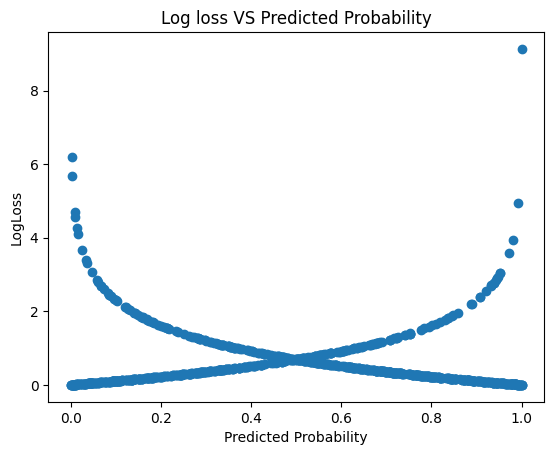

In [ ]:
#Plotting log loss and predicted probability
plt.scatter(y=log_losses, x = y_pred_test_proba)
plt.title('Log loss VS Predicted Probability')
plt.ylabel('LogLoss')
plt.xlabel('Predicted Probability')
plt.show()

In [ ]:
compute_log_loss(y_obs=y_test, y_pred=y_pred_test_proba)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Activity    0.577951
dtype: float64

### Testing the second dataset

In [ ]:
# Second dataset :
X_train = pd.read_csv("X_train_2.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_2.csv", index_col=[0])
print(y_train.shape)
X_train_reshaped = np.reshape(X_train,(2813, 509))#X_train.shape

(2813, 509)
(2813, 1)


In [ ]:
model = cnn_simple()
history = model.fit(X_train_reshaped, y_train, validation_split = 0.2, epochs=20, batch_size=50)

Epoch 1/20


ValueError: ignored

## Trying Radial Basis Networks

In [ ]:
from keras.layers import Layer
from keras.initializers import RandomUniform
import tensorflow as tf
from keras import backend as K


class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder


# Build the RBF network model
model_rb = Sequential()
model_rb.add(RBFLayer(units=512, gamma = 0.9, input_shape=(X_train.shape[1],)))
model_rb.add(Dense(1, activation='sigmoid'))

# Compile the model
model_rb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




early_stopping = EarlyStopping(monitor='val_accuracy', patience=30)
history_rb = model_rb.fit(X_train_reshaped, y_train, validation_split = 0.2, epochs=30, batch_size=70, callbacks=early_stopping)# partir de 30 epochs surapprentuissage visibke

"""
# Evaluate the model
loss, accuracy = model_rb.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')"""


Epoch 1/30
30/30 [==============================] - 1s 21ms/step - loss: 0.6928 - accuracy: 0.5381 - val_loss: 0.6926 - val_accuracy: 0.5352
Epoch 2/30
30/30 [==============================] - 0s 15ms/step - loss: 0.6922 - accuracy: 0.5410 - val_loss: 0.6921 - val_accuracy: 0.5352
Epoch 3/30
30/30 [==============================] - 0s 15ms/step - loss: 0.6917 - accuracy: 0.5410 - val_loss: 0.6918 - val_accuracy: 0.5352
Epoch 4/30
30/30 [==============================] - 0s 15ms/step - loss: 0.6913 - accuracy: 0.5410 - val_loss: 0.6915 - val_accuracy: 0.5352
Epoch 5/30
30/30 [==============================] - 0s 14ms/step - loss: 0.6910 - accuracy: 0.5410 - val_loss: 0.6913 - val_accuracy: 0.5352
Epoch 6/30
30/30 [==============================] - 0s 16ms/step - loss: 0.6907 - accuracy: 0.5410 - val_loss: 0.6911 - val_accuracy: 0.5352
Epoch 7/30
30/30 [==============================] - 0s 16ms/step - loss: 0.6906 - accuracy: 0.5410 - val_loss: 0.6910 - val_accuracy: 0.5352
Epoch 8/30
30

KeyboardInterrupt: ignored

TODO :
- un modèle CNN avec tout
- Scale le Dataset + Réechantillonner
- RBFLayer

## CNN Full model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_full = pd.read_csv("train.csv")
X = df_full.drop('Activity',axis=1)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X = scaler.fit_transform(X)
y = df_full['Activity']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3, shuffle=1)
print(X_train.shape)
X_train_reshaped = np.reshape(X_train,(2813, 1776))#X_train.shape


(2813, 1776)


In [ ]:
  model_manual = cnn_model_manual(layers=2, n_filters=78, input_shape = (1776,1))
  #early_stopping = EarlyStopping(monitor='val_accuracy', patience=30)

  history = model_manual.fit(X_train_reshaped, y_train, validation_split = 0.2, epochs=200, batch_size=70)# partir de 30 epochs surapprentuissage visibke


Epoch 1/200
33/33 [==============================] - 5s 62ms/step - loss: 1.2865 - accuracy: 0.4871 - val_loss: 0.6932 - val_accuracy: 0.4654
Epoch 2/200
33/33 [==============================] - 2s 53ms/step - loss: 0.6921 - accuracy: 0.5449 - val_loss: 0.6931 - val_accuracy: 0.4973
Epoch 3/200
33/33 [==============================] - 2s 52ms/step - loss: 0.6927 - accuracy: 0.5467 - val_loss: 0.6948 - val_accuracy: 0.4654
Epoch 4/200
33/33 [==============================] - 2s 56ms/step - loss: 0.6873 - accuracy: 0.5587 - val_loss: 0.6981 - val_accuracy: 0.4654
Epoch 5/200
33/33 [==============================] - 2s 56ms/step - loss: 0.6832 - accuracy: 0.5680 - val_loss: 0.6965 - val_accuracy: 0.4654
Epoch 6/200
33/33 [==============================] - 2s 54ms/step - loss: 0.6787 - accuracy: 0.5582 - val_loss: 0.7016 - val_accuracy: 0.4654
Epoch 7/200
33/33 [==============================] - 2s 54ms/step - loss: 0.6740 - accuracy: 0.5858 - val_loss: 0.6998 - val_accuracy: 0.4654
Epoch 

## Test modèle article

In [ ]:
X_train = pd.read_csv("X_train_1.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_1.csv")
print(y_train.shape)
# Reshape data :
X_train_reshaped = np.reshape(X_train,(2625, 1112))#X_train.shape (2813, 1112)

(2625, 1112)
(2625, 1)


In [ ]:
def cnn_article(input_shape):
  model = Sequential()
  model.add(Conv1D(100,1, activation="relu", input_shape=input_shape))
  model.add(MaxPooling1D(3))
  model.add(Dropout(0.5))
  #model.add(Flatten())
  model.add(Dense(512, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer=Adam(learning_rate=0.009), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = cnn_article((1112, 1))
history = model.fit(X_train_reshaped, y_train, validation_split = 0.2, epochs=20, batch_size=200)

Epoch 1/20
11/11 [==============================] - 3s 102ms/step - loss: 0.6971 - accuracy: 0.5341 - val_loss: 0.6902 - val_accuracy: 0.5352
Epoch 2/20
11/11 [==============================] - 1s 62ms/step - loss: 0.6900 - accuracy: 0.5410 - val_loss: 0.6902 - val_accuracy: 0.5352
Epoch 3/20
11/11 [==============================] - 1s 58ms/step - loss: 0.6902 - accuracy: 0.5410 - val_loss: 0.6902 - val_accuracy: 0.5352
Epoch 4/20
11/11 [==============================] - 1s 56ms/step - loss: 0.6895 - accuracy: 0.5410 - val_loss: 0.6901 - val_accuracy: 0.5352
Epoch 5/20
11/11 [==============================] - 1s 57ms/step - loss: 0.6896 - accuracy: 0.5410 - val_loss: 0.6901 - val_accuracy: 0.5352
Epoch 6/20
11/11 [==============================] - 1s 58ms/step - loss: 0.6897 - accuracy: 0.5410 - val_loss: 0.6902 - val_accuracy: 0.5352
Epoch 7/20
11/11 [==============================] - 1s 57ms/step - loss: 0.6897 - accuracy: 0.5410 - val_loss: 0.6902 - val_accuracy: 0.5352
Epoch 8/20
 

KeyboardInterrupt: ignored